<a href="https://www.linkedin.com/in/gohjieda/"><img src = "https://images.unsplash.com/photo-1534430480872-3498386e7856?ixlib=rb-1.2.1&w=1000&q=80" width = 800> </a>

<h1 align=center><font size = 5>Is it Possible to Find Ideal Rental Apartments using a Data Driven Approach?</font></h1>

## Scenario and Background

In fall 2019, I met with a close friend, Joshua (a pseudonym), who was employed in a reputable wealth management firm in Singapore. He had been offered an attractive relocation package to the firm’s office in Manhattan, New York City (NYC). However, he was stuck in a dilemma on acceptance of the offer, citing various reasons and concerns such as:

- Missing his family
- Possibility of forgoing the convenience to his current work place
- Ability to enjoy similar level of comfort in the rental apartment with his given budget 
- Uncertainty of having good Chinese cuisines within close proximity to his rental apartment

Based on the above reasons, he asked if I could use a data driven approach to address his concerns and allow him to make a more informed decision.


## The Problem

#### It is totally understandable that my friend expressed many concerns. To comprehensively understand his concerns and break it down into smaller and more specific pieces, I delved deeper by asking him more specific questions which ultimately enabled me to devise an analytical approach to solve his problem. The revised problem would be as follows:

Finding an ideal apartment in Manhattan, NYC, that meets the following conditions:

1. Rental apartment with a furnished private room
2. Monthly rental of US$5000/month or less
3. Located within 800 meters (m) to a subway metro station in Manhattan
4. Wide variety of Chinese cuisines within close proximity of 1 kilometre (km) to his rental apartment


## Data Driven Approach

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Import Relevant Libraries</a><br><br>

2. <a href="#item2">Explore the Neighborhoods in Manhattan</a><br><br>

3. <a href="#item3">Analyze Each Neighborhood in Greater Details</a><br><br>

4. <a href="#item4">Cluster the Neighborhoods using K-means Algorithm</a><br><br>

5. <a href="#item5">Examine the Clusters</a><br><br>

6. <a href="#item6">Obtain the Listing Results from Craigslist Based on Defined Criterias</a><br><br>

7. <a href="#item7">Compute the Distance of the Listing Results to Each Subway Station as well as the Distance to our Ideal Neighborhoods attained (Lower East Side and Chinatown)</a><br><br>

8. <a href="#item8">Achieve the Optimal Results by Retrieving Listings that are within 800m from the Nearest Subway Station and within 1km to our Ideal Neighborhoods (Lower East Side & Chinatown)</a><br><br>
</font>
</div>

<a id='item1'></a>

## 1. Import Relevant Libraries

In [1]:
import numpy as np

In [2]:
from sklearn.cluster import KMeans

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Craigslist wrapper
from craigslist import CraigslistHousing

# for haversine formula 
from math import radians, cos, sin, asin, sqrt

print('Libraries imported.')

Libraries imported.


<a id='item2'></a>

## 2. Downloading and Exploring the New York City Dataset

New York City Dataset has a total of 5 boroughs and 306 neighborhoods.

Link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

In [4]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [5]:
# load dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [6]:
newyork_data

{'bbox': [-74.2492599487305,
  40.5033187866211,
  -73.7061614990234,
  40.9105606079102],
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-73.84720052054902,
     40.89470517661],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.1',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661],
    'borough': 'Bronx',
    'name': 'Wakefield',
    'stacked': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.2',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.874294193

In [7]:
# the features key contains the relevant information
neighborhoods_data = newyork_data['features']

In [8]:
# first item in the list
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

### Tranform the data into a *pandas* dataframe

In [9]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [10]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [11]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [12]:
# examine first 5 rows
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [13]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### Use geopy library to get the latitude and longitude values of New York City.

In [14]:
# define an instance of the geocoder, we need to define a user_agent
address = 'New York City, NY'

#geolocator = Nominatim(user_agent="ny_explorer")
geolocator = Nominatim(user_agent="ny_explorer")

In [15]:
# function to obtain the latitude and longitude values
def geocode_me(Location):
    try:
        return geolocator.geocode(Location)
    except GeocoderTimedOut:
        return geocode_me(Location)

In [16]:
geocode_me(address)

Location(New York, United States of America, (40.7127281, -74.0060152, 0.0))

In [17]:
address = 'New York City, NY'

#geolocator = Nominatim(user_agent="ny_explorer")
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Create a map of New York with neighborhoods being superimposed.

In [18]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Further segment and cluster to neighborhoods in Manhattan

In [19]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [20]:
# geographical coordinates of Manhattan
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


Similarly, visualizing Manhattan with the neighborhoods in it.

In [21]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### Utilizing the Foursquare API to explore the neighborhoods and segment them

In [22]:
import foursquare_credentials as credentials

In [23]:
CLIENT_ID = credentials.CLIENT_ID # your Foursquare ID
CLIENT_SECRET = credentials.CLIENT_SECRET # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [24]:
# get the neighborhood's latitude and longitude values.
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


### Obtaining the top 100 venues that are in Marble Hill within a radius of 500 meters.

In [25]:
LIMIT = 100
radius = 500
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e91afca78a484001b889f2a'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b4429abf964a52037f225e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1ca941735',
         'name': 'Pizza Place',
         'pluralName': 'Pizza Places',
         'primary': True,
         'shortName': 'Pizza'}],
       'delivery': {'id': '72548',
        'provider': {'icon': {'name': '/delivery_provider_seamless_20180129.png',
          'prefix': 'https://fastly.4sqi.net/img/general/cap/',
          'sizes': [40, 50]},
         'name': 'seamless'},
        'url': 'https://www.seamless.com/menu/arturos-pizza-5189-broadway-ave-new-york/72548?affiliate=1131&utm_source=foursquare-affiliat

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
# map the json results from foursquare api into a pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Dunkin',Donut Shop,40.877136,-73.906666
4,Starbucks,Coffee Shop,40.877531,-73.905582


In [29]:
# number of venues returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore the Neighborhoods in Manhattan

In [30]:
# function to get all the neighborhoods in Manhattan
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [32]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3220, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [33]:
# number of venues obtained for each neighborhood
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,77,77,77,77,77,77
Carnegie Hill,94,94,94,94,94,94
Central Harlem,41,41,41,41,41,41
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


In [34]:
# number of unique categories that can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 320 uniques categories.


<a id='item3'></a>

## 3. Analyze Each Neighborhood in Greater Details

In [35]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup 

In [36]:
manhattan_onehot.shape

(3220, 321)

In [37]:
# grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup 

In [38]:
manhattan_grouped.shape

(40, 321)

In [39]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.08
1    Coffee Shop  0.06
2          Hotel  0.06
3            Gym  0.04
4  Memorial Site  0.04


----Carnegie Hill----
                  venue  freq
0           Coffee Shop  0.07
1                  Café  0.05
2           Yoga Studio  0.03
3  Gym / Fitness Center  0.03
4             Bookstore  0.03


----Central Harlem----
                 venue  freq
0   Chinese Restaurant  0.05
1   Seafood Restaurant  0.05
2   African Restaurant  0.05
3  American Restaurant  0.05
4    French Restaurant  0.05


----Chelsea----
                 venue  freq
0          Coffee Shop  0.09
1          Art Gallery  0.05
2  American Restaurant  0.04
3               Bakery  0.03
4   Italian Restaurant  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.09
1         Cocktail Bar  0.05
2  American Restaurant  0.04
3               Bakery  0.04
4    Hotpot Restaurant  0.03


----Civic Center----
                  venue 

In [40]:
# function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
# create a new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Pizza Place,Food Court,Clothing Store,Boat or Ferry,Sandwich Place
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Gym / Fitness Center,Bookstore,Japanese Restaurant,Pizza Place,Bakery,Italian Restaurant,Gym
2,Central Harlem,Seafood Restaurant,Chinese Restaurant,French Restaurant,Bar,African Restaurant,American Restaurant,Gym / Fitness Center,Gym,Fried Chicken Joint,Tapas Restaurant
3,Chelsea,Coffee Shop,Art Gallery,American Restaurant,Hotel,Italian Restaurant,Ice Cream Shop,Bakery,Market,Cocktail Bar,Cycle Studio
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Spa,Hotpot Restaurant,Optical Shop,Vietnamese Restaurant,Salon / Barbershop,Malay Restaurant


In [42]:
#for each value of k, initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,8)
for k in K:
    k_means = KMeans(n_clusters=k, random_state= 1)
    model = k_means.fit(manhattan_grouped.drop('Neighborhood', 1))
    sum_of_squared_distances.append(k_means.inertia_)

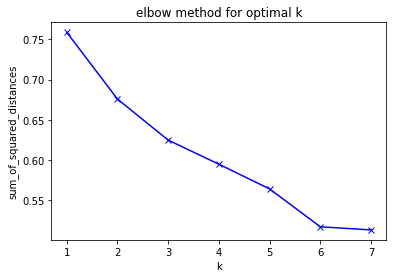

In [43]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

<a id='item4'></a>

## 4. Cluster the Neighborhoods using K-means Algorithm

Using the elbow method on the results above, run *k*-means to cluster the neighborhood into 6 clusters.

In [44]:
# set number of clusters
kclusters = 6

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 5, 5, 5, 4, 0, 0, 4, 5, 5], dtype=int32)

In [45]:
# merge cluster results with the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Sandwich Place,Coffee Shop,Gym,Yoga Studio,Shopping Mall,Steakhouse,Seafood Restaurant,Supplement Shop,Donut Shop,Bank
1,Manhattan,Chinatown,40.715618,-73.994279,4,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Spa,Hotpot Restaurant,Optical Shop,Vietnamese Restaurant,Salon / Barbershop,Malay Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Grocery Store,Mobile Phone Shop,Chinese Restaurant,Spanish Restaurant,Coffee Shop,Mexican Restaurant,Latin American Restaurant,Donut Shop
3,Manhattan,Inwood,40.867684,-73.921210,4,Mexican Restaurant,Pizza Place,Restaurant,Café,Lounge,Frozen Yogurt Shop,Deli / Bodega,Chinese Restaurant,Bakery,Park
4,Manhattan,Hamilton Heights,40.823604,-73.949688,4,Pizza Place,Café,Mexican Restaurant,Coffee Shop,Deli / Bodega,Bakery,School,Caribbean Restaurant,Sandwich Place,Chinese Restaurant


### Visualizing the resulting clusters

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine the Clusters

#### Cluster 1

In [47]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Coffee Shop,Bakery,Gym / Fitness Center,Yoga Studio,Pizza Place,French Restaurant,Juice Bar,Exhibit,Hotel
14,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,Coffee Shop,Spa,Gym,American Restaurant,Sandwich Place,Hotel,Cocktail Bar
15,Midtown,Hotel,Steakhouse,Coffee Shop,Clothing Store,Sporting Goods Shop,Sandwich Place,Theater,Café,American Restaurant,Gym
22,Little Italy,Bakery,Hotel,Café,Bubble Tea Shop,Chinese Restaurant,Cocktail Bar,Thai Restaurant,Mediterranean Restaurant,Spa,Salon / Barbershop
23,Soho,Italian Restaurant,Clothing Store,Coffee Shop,Bakery,Boutique,Mediterranean Restaurant,Hotel,Salon / Barbershop,Vegetarian / Vegan Restaurant,Café
31,Noho,Italian Restaurant,Coffee Shop,French Restaurant,Cocktail Bar,Hotel,Grocery Store,Mexican Restaurant,Yoga Studio,Art Gallery,Pizza Place
32,Civic Center,Coffee Shop,French Restaurant,Gym / Fitness Center,Hotel,Cocktail Bar,Spa,Yoga Studio,Park,Sushi Restaurant,American Restaurant
33,Midtown South,Korean Restaurant,Hotel,Japanese Restaurant,Dessert Shop,Coffee Shop,Restaurant,Burger Joint,Clothing Store,American Restaurant,Salad Place
34,Sutton Place,Italian Restaurant,Gym / Fitness Center,Gym,Coffee Shop,Furniture / Home Store,Park,Pizza Place,Yoga Studio,Hotel,Latin American Restaurant
38,Flatiron,New American Restaurant,Gym / Fitness Center,Café,Spa,American Restaurant,Japanese Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Yoga Studio,Cycle Studio


#### Cluster 2

In [48]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Manhattanville,Coffee Shop,Seafood Restaurant,Park,Chinese Restaurant,Italian Restaurant,Mexican Restaurant,Supermarket,Dumpling Restaurant,Café,Climbing Gym
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Wine Shop
10,Lenox Hill,Italian Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Cocktail Bar,Gym / Fitness Center,Burger Joint,Gym,Café,Thai Restaurant
11,Roosevelt Island,Playground,Sandwich Place,Liquor Store,Supermarket,Food & Drink Shop,Metro Station,Soccer Field,Farmers Market,School,Dry Cleaner
12,Upper West Side,Italian Restaurant,Coffee Shop,Bar,Bakery,Mediterranean Restaurant,Shoe Store,Sports Bar,Sushi Restaurant,Bagel Shop,Dessert Shop
13,Lincoln Square,Café,Theater,Plaza,Italian Restaurant,Concert Hall,Performing Arts Venue,Indie Movie Theater,Gym / Fitness Center,Wine Shop,American Restaurant
18,Greenwich Village,Italian Restaurant,Café,Sushi Restaurant,American Restaurant,Gym,Indian Restaurant,French Restaurant,Clothing Store,Seafood Restaurant,Chinese Restaurant
21,Tribeca,Park,Italian Restaurant,Café,American Restaurant,Wine Bar,Coffee Shop,Spa,Playground,Basketball Court,Scenic Lookout
24,West Village,Italian Restaurant,New American Restaurant,Wine Bar,American Restaurant,Park,Jazz Club,Cocktail Bar,Bakery,Coffee Shop,Theater
35,Turtle Bay,Italian Restaurant,Coffee Shop,Café,French Restaurant,Hotel,Sushi Restaurant,Japanese Restaurant,Park,Wine Bar,Karaoke Bar


#### Cluster 3

In [49]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Boat or Ferry,Park,Bar,Fountain,Harbor / Marina,Pet Service,Coffee Shop,Cocktail Bar,Farmers Market,Gas Station


#### Cluster 4

In [50]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Coffee Shop,Gym,Yoga Studio,Shopping Mall,Steakhouse,Seafood Restaurant,Supplement Shop,Donut Shop,Bank


#### Cluster 5

In [51]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Spa,Hotpot Restaurant,Optical Shop,Vietnamese Restaurant,Salon / Barbershop,Malay Restaurant
2,Washington Heights,Café,Bakery,Grocery Store,Mobile Phone Shop,Chinese Restaurant,Spanish Restaurant,Coffee Shop,Mexican Restaurant,Latin American Restaurant,Donut Shop
3,Inwood,Mexican Restaurant,Pizza Place,Restaurant,Café,Lounge,Frozen Yogurt Shop,Deli / Bodega,Chinese Restaurant,Bakery,Park
4,Hamilton Heights,Pizza Place,Café,Mexican Restaurant,Coffee Shop,Deli / Bodega,Bakery,School,Caribbean Restaurant,Sandwich Place,Chinese Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Park,Deli / Bodega,Latin American Restaurant,French Restaurant,Steakhouse,Street Art,Restaurant
20,Lower East Side,Chinese Restaurant,Coffee Shop,Pizza Place,Cocktail Bar,Art Gallery,Ramen Restaurant,Bakery,Café,Clothing Store,Rock Club


#### Cluster 6

In [52]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 5, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Harlem,Seafood Restaurant,Chinese Restaurant,French Restaurant,Bar,African Restaurant,American Restaurant,Gym / Fitness Center,Gym,Fried Chicken Joint,Tapas Restaurant
16,Murray Hill,Coffee Shop,Sandwich Place,Hotel,Bar,Gym / Fitness Center,American Restaurant,Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant
17,Chelsea,Coffee Shop,Art Gallery,American Restaurant,Hotel,Italian Restaurant,Ice Cream Shop,Bakery,Market,Cocktail Bar,Cycle Studio
19,East Village,Bar,Pizza Place,Ice Cream Shop,Wine Bar,Coffee Shop,Mexican Restaurant,Cocktail Bar,Speakeasy,Ramen Restaurant,Italian Restaurant
25,Manhattan Valley,Indian Restaurant,Coffee Shop,Mexican Restaurant,Bar,Yoga Studio,Chinese Restaurant,Thai Restaurant,Pizza Place,Café,Caribbean Restaurant
26,Morningside Heights,Park,Coffee Shop,American Restaurant,Bookstore,Burger Joint,Deli / Bodega,Food Truck,Tennis Court,New American Restaurant,Salad Place
27,Gramercy,Bar,Italian Restaurant,Pizza Place,American Restaurant,Thai Restaurant,Mexican Restaurant,Ice Cream Shop,Cocktail Bar,Playground,Grocery Store
28,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Pizza Place,Food Court,Clothing Store,Boat or Ferry,Sandwich Place
29,Financial District,Coffee Shop,Pizza Place,Bar,Cocktail Bar,American Restaurant,Hotel,Japanese Restaurant,Gym,Gym / Fitness Center,Café
30,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Gym / Fitness Center,Bookstore,Japanese Restaurant,Pizza Place,Bakery,Italian Restaurant,Gym


In [53]:
manhattan_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Sandwich Place,Coffee Shop,Gym,Yoga Studio,Shopping Mall,Steakhouse,Seafood Restaurant,Supplement Shop,Donut Shop,Bank
1,Manhattan,Chinatown,40.715618,-73.994279,4,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Spa,Hotpot Restaurant,Optical Shop,Vietnamese Restaurant,Salon / Barbershop,Malay Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Grocery Store,Mobile Phone Shop,Chinese Restaurant,Spanish Restaurant,Coffee Shop,Mexican Restaurant,Latin American Restaurant,Donut Shop
3,Manhattan,Inwood,40.867684,-73.921210,4,Mexican Restaurant,Pizza Place,Restaurant,Café,Lounge,Frozen Yogurt Shop,Deli / Bodega,Chinese Restaurant,Bakery,Park
4,Manhattan,Hamilton Heights,40.823604,-73.949688,4,Pizza Place,Café,Mexican Restaurant,Coffee Shop,Deli / Bodega,Bakery,School,Caribbean Restaurant,Sandwich Place,Chinese Restaurant
5,Manhattan,Manhattanville,40.816934,-73.957385,1,Coffee Shop,Seafood Restaurant,Park,Chinese Restaurant,Italian Restaurant,Mexican Restaurant,Supermarket,Dumpling Restaurant,Café,Climbing Gym
6,Manhattan,Central Harlem,40.815976,-73.943211,5,Seafood Restaurant,Chinese Restaurant,French Restaurant,Bar,African Restaurant,American Restaurant,Gym / Fitness Center,Gym,Fried Chicken Joint,Tapas Restaurant
7,Manhattan,East Harlem,40.792249,-73.944182,4,Mexican Restaurant,Bakery,Thai Restaurant,Park,Deli / Bodega,Latin American Restaurant,French Restaurant,Steakhouse,Street Art,Restaurant
8,Manhattan,Upper East Side,40.775639,-73.960508,0,Italian Restaurant,Coffee Shop,Bakery,Gym / Fitness Center,Yoga Studio,Pizza Place,French Restaurant,Juice Bar,Exhibit,Hotel
9,Manhattan,Yorkville,40.775930,-73.947118,1,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Wine Shop


### Identify neighborhoods with Chinese Restaurant being the Top 2 Most Common Venue

In [54]:
most_chinese_cruisine = manhattan_merged[(manhattan_merged["1st Most Common Venue"]=="Chinese Restaurant") | 
                     (manhattan_merged["2nd Most Common Venue"]=="Chinese Restaurant")]

In [55]:
most_chinese_cruisine

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Manhattan,Chinatown,40.715618,-73.994279,4,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Spa,Hotpot Restaurant,Optical Shop,Vietnamese Restaurant,Salon / Barbershop,Malay Restaurant
6,Manhattan,Central Harlem,40.815976,-73.943211,5,Seafood Restaurant,Chinese Restaurant,French Restaurant,Bar,African Restaurant,American Restaurant,Gym / Fitness Center,Gym,Fried Chicken Joint,Tapas Restaurant
20,Manhattan,Lower East Side,40.717807,-73.980890,4,Chinese Restaurant,Coffee Shop,Pizza Place,Cocktail Bar,Art Gallery,Ramen Restaurant,Bakery,Café,Clothing Store,Rock Club


<a id='item6'></a>

## 6. Obtain the Listing Results from Craigslist Based on Defined Criterias

In [56]:
CraigslistHousing.show_filters()

Base filters:
* query = ...
* search_titles = True/False
* has_image = True/False
* posted_today = True/False
* bundle_duplicates = True/False
* search_distance = ...
* zip_code = ...
Section specific filters:
* min_price = ...
* max_price = ...
* min_bedrooms = ...
* max_bedrooms = ...
* min_bathrooms = ...
* max_bathrooms = ...
* min_ft2 = ...
* max_ft2 = ...
* private_room = True/False
* private_bath = True/False
* cats_ok = True/False
* dogs_ok = True/False
* is_furnished = True/False
* no_smoking = True/False
* wheelchair_acccess = True/False
* ev_charging = True/False
* no_application_fee = True/False
* no_broker_fee = True/False
* housing_type = 'apartment', 'condo', 'cottage/cabin', 'duplex', 'flat', 'house', 'in-law', 'loft', 'townhouse', 'manufactured', 'assisted living', 'land'
* laundry = 'w/d in unit', 'w/d hookups', 'laundry in bldg', 'laundry on site', 'no laundry on site'
* parking = 'carport', 'attached garage', 'detached garage', 'off-street parking', 'street parking'

In [57]:
# apa : apartment / housing for rent
# mnh : Manhattan
craigs_manhattan = CraigslistHousing(site='newyork', area='mnh', category='apa',
                         filters={'max_price': 5000,
                                  'private_room': True,'is_furnished' : True})

result_df = pd.DataFrame()
for result in craigs_manhattan.get_results(sort_by='newest', geotagged=True):
    result_df = result_df.append(result, ignore_index=True)

In [58]:
# saving the results into a csv 
result_df.to_csv("craiglist_results.csv", index=0)

In [59]:
craiglist_results = pd.read_csv("craiglist_results.csv")

In [60]:
craiglist_results

,datetime,geotag,has_image,id,last_updated,name,price,repost_of,url,where
0,2020-04-10 21:21,"(40.7597, -73.9918)",1.0,7106563366,2020-04-10 21:21,NO-FEE HOME at TIMES SQUARE - IN HEART OF MANH...,$2250,7.090551e+09,https://newyork.craigslist.org/mnh/apa/d/new-y...,Midtown West
1,2020-04-10 19:39,"(40.7627, -73.9932)",1.0,7106526986,2020-04-10 19:39,FURNISHED Large 1BDR apt for rent in Manhattan...,$2100,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,New York
2,2020-04-10 18:34,"(40.7975, -73.9683)",1.0,7106499097,2020-04-10 18:34,"1 bed, 1 bath, 5 closets, FURNISHED. courtyard...",$2600,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,Upper West Side
3,2020-04-10 17:51,"(40.756527, -73.99402)",1.0,7106478207,2020-04-10 17:51,HELL'S KITCHEN--AMAZING 3 BD/2BA WITH PRIVATE ...,$4500,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,Midtown West
4,2020-04-10 12:03,"(41.0888, -73.5435)",1.0,7106264385,2020-04-10 12:03,"1family very private house 4500$4 bed,3 vaths",$4500,NaN,https://newyork.craigslist.org/mnh/apa/d/stamf...,Stamford
5,2020-04-10 08:27,"(40.7443, -73.9781)",1.0,7106155589,2020-04-10 08:27,Charming studio by owner,$2690,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,Murray Hill
6,2020-04-10 07:57,"(40.7443, -73.9781)",1.0,7106148565,2020-04-10 07:57,Beautiful 1 bedroom apartment by owner,$3290,7.079387e+09,https://newyork.craigslist.org/mnh/apa/d/new-y...,Murray Hill
7,2020-04-10 07:20,"(40.82451, -73.951853)",1.0,7106141925,2020-04-10 07:20,Mention COVID 19 Discount $50 NO FEE Affordabl...,$1575,7.013814e+09,https://newyork.craigslist.org/mnh/apa/d/new-y...,Upper West Side
8,2020-04-09 23:52,"(40.8496, -73.9356)",1.0,7106093669,2020-04-09 23:52,"Spacious 1Br, Furnished, Utilities Included, M...",$1900,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,Inwood / Wash Hts
9,2020-04-09 16:53,"(24.566075, -81.748238)",1.0,7105940694,2020-04-09 16:53,Escape to Key West,$1900,NaN,https://newyork.craigslist.org/mnh/apa/d/key-w...,Key West FL


### Input Subway Station Data

In [61]:
#subway data
subway_data = pd.read_csv("NYC_Transit_Subway_Entrance_And_Exit_Data.csv",
                          usecols= ["Division","Line","Station Name","Station Latitude",
                                    "Station Longitude","Station Location"])

In [62]:
len(subway_data)

1868

In [63]:
subway_data = subway_data.drop_duplicates(subset="Station Name")

In [64]:
subway_data["Division"].value_counts()

BMT    125
IND    118
IRT    113
Name: Division, dtype: int64

In [65]:
subway_data.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Station Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,"(40.660397, -73.998091)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,"(40.655144, -74.003549)"
5,BMT,4 Avenue,45th St,40.648939,-74.010006,"(40.648939, -74.010006)"
9,BMT,4 Avenue,53rd St,40.645069,-74.014034,"(40.645069, -74.014034)"
14,BMT,4 Avenue,59th St,40.641362,-74.017881,"(40.641362, -74.017881)"


In [66]:
len(craiglist_results.id.unique())

219

<a id='item7'></a>

## 7. Compute the Distance of the Listing Results to Each Subway Station as well as the Distance to our Ideal Neighborhoods attained (Lower East Side and Chinatown)

In [67]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [68]:
# Find Closest Distance to Listing
min_dist = None
near_substation = False
bart_dist = "N/A"
bart = ""
MAX_TRANSIT_DIST = 0.8 # kilometers
Results = []
for listing in craiglist_results.iterrows():
    for item in subway_data.iterrows():
        # lat , long , listing lat, listing long
        dist = haversine(item[1][3], item[1][4],
                              float(listing[1][1].split(",")[0].split("(")[1]), 
                              float(listing[1][1].split(",")[1].split(")")[0]))
        #print(dist)
        if (min_dist is None or dist < min_dist) and dist < MAX_TRANSIT_DIST:
            # update with the station name
            min_dist = dist
            bart_dist = dist
            bart = item[1][2]
            near_substation = True
            # Append those listing ID with less than 800m walking distance to 
            Results.append([listing[1][3],dist,bart,item[1][3],item[1][4],
                            float(listing[1][1].split(",")[0].split("(")[1]),
                           float(listing[1][1].split(",")[1].split(")")[0])])

In [69]:
Listing_results = pd.DataFrame(Results,columns=["Listing ID","Distance to Station","Station Name","Station Lat","Station Long","Listing Lat","Listing Long"])

In [70]:
Listing_results

,Listing ID,Distance to Station,Station Name,Station Lat,Station Long,Listing Lat,Listing Long
0,7106563366,0.626803,23rd St,40.741303,-73.989344,40.75970,-73.991800
1,7106563366,0.556162,28th St,40.745494,-73.988691,40.75970,-73.991800
2,7106563366,0.529002,34th St,40.749567,-73.987950,40.75970,-73.991800
3,7106499097,0.438924,96th St,40.791646,-73.964699,40.79750,-73.968300
4,7106155589,0.286732,Grand Central,40.752769,-73.979189,40.74430,-73.978100
5,7106141925,0.216807,137th St-City College,40.822008,-73.953676,40.82451,-73.951853
6,7105859261,0.193972,18th St,40.741040,-73.997871,40.74020,-73.999600
7,7105464691,0.068301,Rector St,40.707220,-74.013342,40.70790,-74.013927
8,7104760087,0.019091,City Hall,40.713282,-74.006978,40.71390,-74.007000


In [71]:
# Find Distance from Listing to Neighbourhood
min_dist = None
near_neighbourhood = False
neigh_dist = "N/A"
neigh = ""
MAX_TRANSIT_DIST = 1 # kilometers
Neighbourhood_1km = []
for listing in Listing_results.iterrows():
    for item in most_chinese_cruisine.iterrows():
        # neigh lat , neigh long , listing lat, listing long
        dist = haversine(item[1][2], item[1][3],
                              listing[1][3],listing[1][4])
        #print(dist)
        if (min_dist is None or dist < min_dist) and dist < MAX_TRANSIT_DIST:
            # update with the station name
            min_dist = dist
            neigh_dist = dist
            neigh = item[1][1]
            near_neighbourhood = True
            # Append those listing ID with less than 800m walking distance to 
            Neighbourhood_1km.append([listing[1][0], neigh, neigh_dist,item[1][2], item[1][3]])

In [72]:
neighbourhood_within_1km = pd.DataFrame(Neighbourhood_1km, columns=["Listing ID","Neighbourhood Name","Distance to Neighbourhood","Neighbourhood Lat","Neighbourhood Long"])

In [73]:
neighbourhood_within_1km

,Listing ID,Neighbourhood Name,Distance to Neighbourhood,Neighbourhood Lat,Neighbourhood Long
0,7106563366,Chinatown,0.959947,40.715618,-73.994279
1,7105859261,Chinatown,0.875714,40.715618,-73.994279


<a id='item8'></a>

## 8. Achieve the Optimal Result by Retrieving Listings which are within 800m from the Nearest Subway Station and within 1km to our Ideal Neighborhoods (Lower East Side & Chinatown)

In [74]:
optimal_results = neighbourhood_within_1km.merge(Listing_results,how="left",on="Listing ID").merge(
    craiglist_results,how="left",left_on="Listing ID", right_on="id")

In [75]:
optimal_results

,Listing ID,Neighbourhood Name,Distance to Neighbourhood,Neighbourhood Lat,Neighbourhood Long,Distance to Station,Station Name,Station Lat,Station Long,Listing Lat,Listing Long,datetime,geotag,has_image,id,last_updated,name,price,repost_of,url,where
0,7106563366,Chinatown,0.959947,40.715618,-73.994279,0.626803,23rd St,40.741303,-73.989344,40.7597,-73.9918,2020-04-10 21:21,"(40.7597, -73.9918)",1.0,7106563366,2020-04-10 21:21,NO-FEE HOME at TIMES SQUARE - IN HEART OF MANH...,$2250,7.090551e+09,https://newyork.craigslist.org/mnh/apa/d/new-y...,Midtown West
1,7106563366,Chinatown,0.959947,40.715618,-73.994279,0.556162,28th St,40.745494,-73.988691,40.7597,-73.9918,2020-04-10 21:21,"(40.7597, -73.9918)",1.0,7106563366,2020-04-10 21:21,NO-FEE HOME at TIMES SQUARE - IN HEART OF MANH...,$2250,7.090551e+09,https://newyork.craigslist.org/mnh/apa/d/new-y...,Midtown West
2,7106563366,Chinatown,0.959947,40.715618,-73.994279,0.529002,34th St,40.749567,-73.987950,40.7597,-73.9918,2020-04-10 21:21,"(40.7597, -73.9918)",1.0,7106563366,2020-04-10 21:21,NO-FEE HOME at TIMES SQUARE - IN HEART OF MANH...,$2250,7.090551e+09,https://newyork.craigslist.org/mnh/apa/d/new-y...,Midtown West
3,7105859261,Chinatown,0.875714,40.715618,-73.994279,0.193972,18th St,40.741040,-73.997871,40.7402,-73.9996,2020-04-09 14:36,"(40.7402, -73.9996)",1.0,7105859261,2020-04-09 14:36,Clean and efficient apartment,$3000,7.088706e+09,https://newyork.craigslist.org/mnh/apa/d/new-y...,Chelsea


In [76]:
optimal_results["url"].iloc[-1]

'https://newyork.craigslist.org/mnh/apa/d/new-york-clean-and-efficient-apartment/7105859261.html'